In [38]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
keys = {0:'spc', 1:'spd', 2:'spg'}
de_genes = pd.read_csv('/home/groups/ConradLab/daniel/sharp_data/jung/de_genes.csv', index_col=0)
de_genes.replace({'cluster':keys}, inplace=True)
int_genes = pd.read_csv("jung_interpretation.csv", index_col=0)

In [5]:
# replace periods in de_genes names with - 
de_genes.index = de_genes.index.str.replace('.', '-')

<ipython-input-5-61fa34981c63>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  de_genes.index = de_genes.index.str.replace('.', '-')


In [19]:
int_genes.index.shape

(6354,)

In [31]:
spg_de_genes = de_genes[de_genes['cluster']=='spg']
s

In [34]:
spg_merged_df = pd.merge(spg_de_genes, int_genes, left_on='gene', right_index=True, how='inner')
spg_merged_df.shape

(2288, 10)

In [35]:
spg_merged_df

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene,spg,spc,spd
Ncl,4.917204e-128,5.125872,0.976,0.035,3.123899e-124,spg,Ncl,20.230345,0.180729,0.079961
Hsp90ab1,4.643990e-116,3.967238,0.976,0.149,2.950327e-112,spg,Hsp90ab1,19.173382,0.787013,0.718458
Dazl,2.691036e-114,4.086714,0.919,0.028,1.709615e-110,spg,Dazl,15.695407,0.201094,0.099881
Anp32b,2.388761e-106,3.495027,0.902,0.043,1.517580e-102,spg,Anp32b,11.414381,0.259211,0.029880
Prrc2c,6.535765e-96,3.105859,0.905,0.081,4.152172e-92,spg,Prrc2c,13.318532,0.020410,0.427625
...,...,...,...,...,...,...,...,...,...,...
Slc29a1,5.241072e-06,0.291843,0.105,0.023,3.329653e-02,spg,Slc29a1,0.043399,0.009798,0.008069
Kri1,5.583180e-06,0.295721,0.105,0.023,3.546994e-02,spg,Kri1,0.079340,0.006825,0.000000
Rgl1,6.832120e-06,0.281312,0.119,0.030,4.340446e-02,spg,Rgl1,0.039233,0.030235,0.014015
Stard9,1.049382e-05,0.251291,0.142,0.045,6.666721e-02,spg,Stard9,0.021179,0.013462,0.037921


In [37]:
spg_merged_df['de_rank'] = spg_merged_df['p_val'].rank()
spg_merged_df['deepLIFT_rank'] = spg_merged_df['spg'].rank(ascending=False)

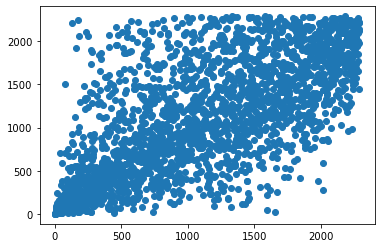

In [39]:
plt.scatter(spg_merged_df['de_rank'], spg_merged_df['deepLIFT_rank'])

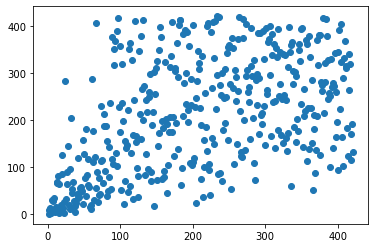

In [43]:
spc_de_genes = de_genes[de_genes['cluster']=='spc']
spc_merged_df = pd.merge(spc_de_genes, int_genes, left_on='gene', right_index=True, how='inner')
spc_merged_df['de_rank'] = spc_merged_df['p_val'].rank()
spc_merged_df['deepLIFT_rank'] = spc_merged_df['spc'].rank(ascending=False)
plt.scatter(spc_merged_df['de_rank'], spc_merged_df['deepLIFT_rank'])

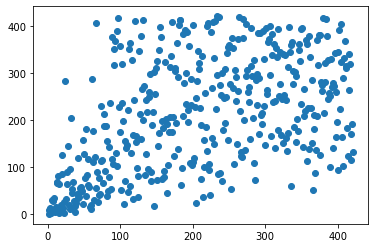

In [44]:
spd_de_genes = de_genes[de_genes['cluster']=='spd']
spd_merged_df = pd.merge(spc_de_genes, int_genes, left_on='gene', right_index=True, how='inner')
spd_merged_df['de_rank'] = spd_merged_df['p_val'].rank()
spd_merged_df['deepLIFT_rank'] = spd_merged_df['spc'].rank(ascending=False)
plt.scatter(spd_merged_df['de_rank'], spd_merged_df['deepLIFT_rank'])

In [27]:
de_genes['cluster']=='spg'

Ncl          True
Hsp90ab1     True
Dazl         True
Anp32b       True
Prrc2c       True
            ...  
Rnf181      False
Cux1        False
Ubxn10      False
Zfp451      False
Pbx4        False
Name: cluster, Length: 3589, dtype: bool

In [3]:
int_genes

,spg,spc,spd
0610009B22Rik,0.013240,0.287479,0.065118
0610009L18Rik,0.027318,2.499897,0.514974
0610009O20Rik,0.025955,0.064048,0.015603
0610010F05Rik,0.010937,0.042857,0.042526
0610011F06Rik,0.189574,0.010890,0.019584
...,...,...,...
mt-Nd3,0.241611,0.015630,0.046804
mt-Nd4,0.082581,0.190041,0.160750
mt-Nd5,3.923431,0.192158,0.366419
mt-Rnr1,4.254885,0.470409,0.050536


In [10]:
int_genes.sort_values("spg", ascending=False).head(10)

,spg,spc,spd
mt-Rnr2,28.581991,8.285803,10.019041
Ncl,20.230345,0.180729,0.079961
Hsp90ab1,19.173382,0.787013,0.718458
Dazl,15.695407,0.201094,0.099881
Prrc2c,13.318532,0.020410,0.427625
Tpr,12.178569,0.040468,0.364495
Anp32b,11.414381,0.259211,0.029880
mt-Nd1,11.121754,0.444485,0.742649
Rpl4,10.891872,0.896442,1.013451
Rbm39,9.742295,0.475143,0.036577


In [11]:
de_genes[de_genes['cluster']=='spg'].head(10)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
Ncl,4.917204e-128,5.125872,0.976,0.035,3.123899e-124,spg,Ncl
Hsp90ab1,4.643990e-116,3.967238,0.976,0.149,2.950327e-112,spg,Hsp90ab1
Dazl,2.691036e-114,4.086714,0.919,0.028,1.709615e-110,spg,Dazl
Anp32b,2.388761e-106,3.495027,0.902,0.043,1.517580e-102,spg,Anp32b
Prrc2c,6.535765e-96,3.105859,0.905,0.081,4.152172e-92,spg,Prrc2c
Ssb,1.790749e-94,3.123623,0.858,0.048,1.137663e-90,spg,Ssb
Taf7l,4.184698e-94,3.398510,0.803,0.028,2.658539e-90,spg,Taf7l
mt.Co1,1.852359e-91,3.651070,0.871,0.101,1.176803e-87,spg,mt.Co1
Rpl4,2.752544e-89,2.711120,0.949,0.181,1.748691e-85,spg,Rpl4
Tpr,3.872502e-89,2.756344,0.898,0.103,2.460201e-85,spg,Tpr


In [12]:
int_genes.sort_values("spc", ascending=False).head(10)

,spg,spc,spd
Ldhc,0.351632,23.709996,4.615430
Ubb,2.220421,21.834673,8.753378
Fabp9,0.258119,21.452827,3.565026
Pabpc1,3.990908,20.404309,9.974965
Meig1,0.115687,17.847964,7.053704
Calm2,4.790556,17.533388,1.278982
Morf4l1,0.410265,17.439189,5.575141
Calm1,0.819953,16.447940,3.897635
Tuba3b,1.945053,13.729678,3.524022
Rsph1,0.091812,13.402599,1.445491


In [13]:
de_genes[de_genes['cluster']=='spc'].head(10)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
Rsph1,1.206500e-46,2.932144,0.696,0.180,7.664897e-43,spc,Rsph1
Ldhc,1.072826e-38,1.470611,0.982,0.422,6.815661e-35,spc,Ldhc
Lyar,8.239780e-31,1.945731,0.784,0.574,5.234732e-27,spc,Lyar
Pabpc1,1.554641e-29,1.353673,0.912,0.802,9.876637e-26,spc,Pabpc1
Morf4l1,2.982783e-29,2.188861,0.719,0.397,1.894962e-25,spc,Morf4l1
Cox8c,8.051960e-29,2.480729,0.614,0.238,5.115410e-25,spc,Cox8c
Ccdc39,2.602560e-26,2.459808,0.409,0.079,1.653406e-22,spc,Ccdc39
Calm1,6.445592e-25,1.863895,0.749,0.597,4.094885e-21,spc,Calm1
Cdc42ep3,1.610687e-23,2.629923,0.298,0.036,1.023269e-19,spc,Cdc42ep3
Meig1,6.063435e-23,1.182332,0.842,0.386,3.852100e-19,spc,Meig1


In [14]:
int_genes.sort_values("spd", ascending=False).head(10)

,spg,spc,spd
Tnp1,0.143538,8.201916,42.319239
Smcp,0.106150,5.974524,26.739155
Tsga8,0.035110,1.372576,14.576832
Dbil5,0.103934,2.976321,13.439147
Gm9999,0.014623,1.698541,13.283370
Acrv1,0.050636,2.494148,11.502768
Odf2,0.893011,3.513143,11.031877
D830044I16Rik,0.034944,1.233688,10.556939
Ccdc136,1.536566,4.922913,10.513517
mt-Rnr2,28.581991,8.285803,10.019041


In [15]:
de_genes[de_genes['cluster']=='spd'].head(10)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
Smcp,5.671747e-97,4.602594,0.876,0.107,3.603261e-93,spd,Smcp
Tnp1,8.732105e-93,5.804006,0.872,0.118,5.547506e-89,spd,Tnp1
Gm9999,2.670408e-75,3.990315,0.673,0.036,1.696510e-71,spd,Gm9999
Fam229a,7.509157e-72,3.865866,0.686,0.056,4.770568e-68,spd,Fam229a
Dbil5,9.043603e-70,3.885798,0.757,0.131,5.745401e-66,spd,Dbil5
Spata3,7.711299e-69,4.047776,0.597,0.019,4.898988e-65,spd,Spata3
D830044I16Rik,4.624568e-68,3.738587,0.646,0.049,2.937988e-64,spd,D830044I16Rik
Spata19,5.439109e-64,3.951269,0.584,0.030,3.455466e-60,spd,Spata19
X1700029H14Rik,7.554791e-64,3.568572,0.584,0.024,4.799559e-60,spd,X1700029H14Rik
X2610318N02Rik,2.944669e-62,3.794548,0.611,0.054,1.870748e-58,spd,X2610318N02Rik


In [16]:
real_labels = pd.read_csv("/home/groups/ConradLab/daniel/sharp_data/pbmc_test/labels_cd4-8.csv", index_col=0).iloc[:,0]
real_labels,keys = pd.factorize(real_labels, sort=True)
keys

Index(['b_cells', 'cd14_monocytes', 'cd4_t_cell', 'cd56_nk', 'cd8_t_cell'], dtype='object')

In [17]:
#PBMC
keys = {0:'b_cells', 1:'cd14_monocytes', 2:'cd4_t_cell', 3:'cd56_nk', 4:'cd8_t_cell'}
de_genes = pd.read_csv('/home/groups/ConradLab/daniel/sharp_data/pbmc_test/de_genes.csv', index_col=0)
de_genes.replace({'cluster':keys}, inplace=True)
int_genes = pd.read_csv("pbmc_test_interpretation.csv", index_col=0)
int_genes = int_genes.abs()
scale_int_genes = pd.DataFrame(preprocessing.scale(int_genes, with_mean=False))
scale_int_genes.columns = int_genes.columns
scale_int_genes.index = int_genes.index
scale_int_genes.sort_values("cd4_t_cell", ascending=False).head(10)

,b_cells,cd14_monocytes,cd4_t_cell,cd56_nk,cd8_t_cell
LTB,27.738410,0.146205,33.070637,0.810016,11.293178
FTH1,10.798422,51.537754,29.218869,6.340851,11.638375
CD3E,0.005234,0.002832,25.040269,2.490053,24.469191
MT-CO2,10.458646,15.498238,24.020895,9.526059,3.384439
RPL34,7.252808,0.535317,23.602739,15.033418,3.154943
S100A4,0.105431,22.049214,23.244718,1.222469,0.645825
CD3D,0.009171,0.018589,22.373944,0.605545,14.378980
RPL37,8.544748,4.127163,21.067187,6.787735,3.865191
RPL7,5.762127,7.818111,19.465482,8.715361,13.682990
UBC,8.455023,19.997481,19.453267,2.208206,0.659358


In [18]:
for cell_type in ['b_cells', 'cd14_monocytes', 'cd4_t_cell', 'cd56_nk', 'cd8_t_cell']:
    print(cell_type)
    print(scale_int_genes.sort_values(cell_type, ascending=False).head(10))
    print(de_genes[de_genes['cluster']==cell_type].head(10))

b_cells
            b_cells  cd14_monocytes  cd4_t_cell   cd56_nk  cd8_t_cell
CD74      71.503861       12.285791    4.777439  7.308379    4.045139
HLA-DRA   49.437657       12.828225    0.633494  0.171549    0.286577
CD79A     32.328959        0.031498    0.124167  0.085082    0.544220
CD79B     31.589568        0.022558    1.034737  1.454509    0.025091
HLA-DRB1  31.462966       21.495164    2.300194  1.155180    1.886261
LTB       27.738410        0.146205   33.070637  0.810016   11.293178
HLA-DPA1  25.073663        1.072749    0.973912  1.023743    1.019922
HLA-DPB1  22.598056        3.853520    0.906961  1.173400    2.249338
HLA-DRB5  16.030404       12.691769    1.230882  0.570063    1.103094
CD37      15.105807        3.969624    0.563628  4.385218    2.156192
          p_val  avg_log2FC  pct.1  pct.2  p_val_adj  cluster      gene
HLA.DRA     0.0    4.824762  0.995  0.043        0.0  b_cells   HLA.DRA
CD74        0.0    4.577505  1.000  0.355        0.0  b_cells      CD74
CD79A 

In [19]:
de_genes.loc['CD4']

p_val                    0.0
avg_log2FC          1.433934
pct.1                  0.179
pct.2                  0.039
p_val_adj                0.0
cluster       cd14_monocytes
gene                     CD4
Name: CD4, dtype: object

In [20]:
de_genes[de_genes['cluster']=='cd4_t_cell'].head(30)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
IL32,0.0,1.335760,0.624,0.357,0.0,cd4_t_cell,IL32
AQP3,0.0,1.219125,0.222,0.044,0.0,cd4_t_cell,AQP3
CD3E,0.0,1.192251,0.761,0.353,0.0,cd4_t_cell,CD3E
LDHB,0.0,1.125452,0.845,0.526,0.0,cd4_t_cell,LDHB
MAL,0.0,1.073924,0.257,0.084,0.0,cd4_t_cell,MAL
CORO1B,0.0,1.067739,0.237,0.075,0.0,cd4_t_cell,CORO1B
JUNB,0.0,1.016254,0.910,0.743,0.0,cd4_t_cell,JUNB
CD27,0.0,0.981557,0.497,0.261,0.0,cd4_t_cell,CD27
CD3D1,0.0,0.964162,0.748,0.372,0.0,cd4_t_cell,CD3D
IL7R,0.0,0.951436,0.328,0.145,0.0,cd4_t_cell,IL7R


In [21]:
de_genes[de_genes['cluster']=='cd4_t_cell'].head(20)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
IL32,0.0,1.335760,0.624,0.357,0.0,cd4_t_cell,IL32
AQP3,0.0,1.219125,0.222,0.044,0.0,cd4_t_cell,AQP3
CD3E,0.0,1.192251,0.761,0.353,0.0,cd4_t_cell,CD3E
LDHB,0.0,1.125452,0.845,0.526,0.0,cd4_t_cell,LDHB
MAL,0.0,1.073924,0.257,0.084,0.0,cd4_t_cell,MAL
CORO1B,0.0,1.067739,0.237,0.075,0.0,cd4_t_cell,CORO1B
JUNB,0.0,1.016254,0.910,0.743,0.0,cd4_t_cell,JUNB
CD27,0.0,0.981557,0.497,0.261,0.0,cd4_t_cell,CD27
CD3D1,0.0,0.964162,0.748,0.372,0.0,cd4_t_cell,CD3D
IL7R,0.0,0.951436,0.328,0.145,0.0,cd4_t_cell,IL7R


In [22]:
de_genes[de_genes['gene']=='LTB']

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
LTB,0.0,0.798045,0.925,0.657,0.0,cd4_t_cell,LTB
LTB1,0.0,0.606523,0.951,0.784,0.0,b_cells,LTB
